In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
from matplotlib import cm

Topic: This is a project to implement K-means algorithm on some dataset with and without the use of Scikit learn

Approach 1: Without Scikit learn

In [326]:
# Step 1: Get data
dataset = pd.read_csv(r"C:\Users\leesi\Documents\Favorites\Data Sources\Practice of K - means algorithm Data\77_cancer_proteomes_CPTAC_itraq_trimed.csv")

In [327]:
# Step 2: Define essential functions
def L2_norm(x, y): # ok
    return np.linalg.norm(x - y)

def centroids_init(X, centroids): # ok
    random_centroids = []
    for i in range(centroids):
        choices = random.choice(list(X.index))
        random_centroids.append(X.iloc[choices, :].values)

    return random_centroids # return a list of np.array
def getColors(num_clusters): # ok
    color = []
    for i in range(num_clusters):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    # return ["grey", "green", "yellow", "purple", "orange"]
    return color 

def plot(X, Centroids, title):
    centroids = X['Centroid'].unique()
    num_clusters = len(centroids)
    colors = getColors(num_clusters)

    for i, centroid in enumerate(centroids):
        data = X[X['Centroid'] == centroid]
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color=colors[i], label=f'Centroid {centroid}')

    # Plotting all centroid points
    centroid_x = [centroid[0] for centroid in Centroids]
    centroid_y = [centroid[1] for centroid in Centroids]
    plt.scatter(centroid_x, centroid_y, color='blue', marker='*', s=110, label='Centroids')

    # Add labels and legend
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.title(title, fontsize=16)

    # Show the plot
    plt.show()

In [319]:
# Test centroids_init function - ok
print(centroids_init(dataset, 5)[0])
print(centroids_init(dataset, 5))

[ 0.4294165 -1.3650761]
[array([-1.59739612, -0.61621812]), array([-0.90782265, -0.2397652 ]), array([1.57235595, 1.7558401 ]), array([-3.10607619, -0.87123462]), array([-1.17831832, -0.4300156 ])]


In [320]:
# Test L2_norm function - ok
print(L2_norm(centroids_init(dataset, 1)[0],dataset.iloc[1, :].values))

4.214636062952342


In [361]:
# Step 3: Implement the k_means_1 algorithm
def k_means_1(dataset, K = 4, iterations = 20):
    X = dataset.copy()
    random_centroids = centroids_init(X, K) # return a list of np.array that contain the random centroids
    m = X.shape[0]
    X['Centroid'] = 0
    X['Distance_to_nearest_centroid'] = 1000000000.
    total_inertia = 0
    
    for g in range(iterations): # For each interation
        for i in range(m): # For each datapoint
            for j in range(K): # For each centroid
                distance_current_centroids = L2_norm(random_centroids[j], X.iloc[i, :-2].values)
                if distance_current_centroids < X.at[i, 'Distance_to_nearest_centroid']:
                    X.at[i, 'Distance_to_nearest_centroid'] = distance_current_centroids
                    X.at[i, 'Centroid'] = j # 0, 1, 2, ..., K - 1
        total_inertia = X['Distance_to_nearest_centroid'].sum()
        print("The total inertia after iteration " + str(g + 1) + " is " + str(total_inertia)) 
        if g != iterations - 1:
            X['Distance_to_nearest_centroid'] = 1000000000.
        
        for i in range(K):
            random_centroids[i] = np.array(X[X['Centroid'] == i].iloc[:, :-2].mean(axis = 0))
        print("Centoids: " + str(random_centroids))
    return X, random_centroids, total_inertia

In [362]:
# Step 4: Run K - means on our credit card customer data
K = 10
iterations = 50
Clustered_data, Centroids, total_inertia = k_means_1(dataset, K, iterations)

The total inertia after iteration 1 is 4517.8890267369925
Centoids: [array([-0.83932076,  0.04501692]), array([-0.54754365, -0.77996891]), array([ 0.94901613, -0.31576906]), array([2.40140648, 0.44980432]), array([0.017002  , 0.21010678]), array([1.04248982, 0.8649358 ]), array([4.26363485, 0.02009549]), array([-0.19567887,  0.66288054]), array([-2.02114844, -3.17899279]), array([-0.07107274,  2.10625399])]
The total inertia after iteration 2 is 3789.058657254454
Centoids: [array([-1.18834753,  0.04070106]), array([-0.54037573, -0.96372439]), array([ 0.90409791, -0.44806644]), array([2.37986917, 0.68624788]), array([0.11368291, 0.08451666]), array([1.05224881, 0.99368336]), array([4.63411027, 0.12927372]), array([-0.16477623,  0.81529757]), array([-2.8921244 , -3.26448561]), array([-0.11244262,  2.65967569])]
The total inertia after iteration 3 is 3720.253486290818
Centoids: [array([-1.31690493, -0.02375555]), array([-0.57342385, -1.1041391 ]), array([ 0.95634598, -0.51666555]), array(

In [363]:
print(Clustered_data)

      Column 1  Column 2  Centroid  Distance_to_nearest_centroid
0     1.096131  2.609943         5                      1.299207
1     1.111370  2.650422         5                      1.341593
2     1.111370  2.650422         5                      1.341593
3     1.107561  2.646374         5                      1.336143
4     1.115180  2.646374         5                      1.340184
...        ...       ...       ...                           ...
5294  1.941906  0.930072         3                      0.492548
5295  1.888569  0.703391         3                      0.719950
5296 -0.069667 -0.725511         4                      0.198859
5297  0.078915  1.893468         5                      0.499941
5298  0.398938 -0.231669         7                      0.733448

[5299 rows x 4 columns]


In [364]:
# Step 5: Output the result to a csv file
Clustered_data.to_csv(r"C:\Users\leesi\OneDrive\Desktop(Major File)\Study Materials\Notes Jotting\Machine Learning - CS229\Coding project\Prj 3\Result.txt", sep='\t', index=False)

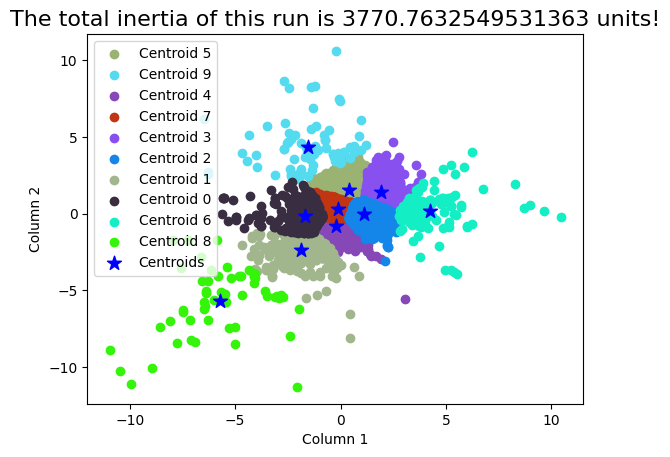

In [365]:
# Step 6: Plot the clustered dataset
plot(Clustered_data, Centroids, "The total inertia of this run is " + str(total_inertia) + " units!")

In [369]:
# Step 7: Create a k_means_2
def k_means_2(dataset, K = 4, iterations = 20):
    X = dataset.copy()
    random_centroids = centroids_init(X, K) # return a list of np.array that contain the random centroids
    m = X.shape[0]
    X['Centroid'] = 0
    X['Distance_to_nearest_centroid'] = 1000000000.
    total_inertia = 0
    
    for g in range(iterations): # For each interation
        for i in range(m): # For each datapoint
            for j in range(K): # For each centroid
                distance_current_centroids = L2_norm(random_centroids[j], X.iloc[i, :-2].values)
                if distance_current_centroids < X.at[i, 'Distance_to_nearest_centroid']:
                    X.at[i, 'Distance_to_nearest_centroid'] = distance_current_centroids
                    X.at[i, 'Centroid'] = j # 0, 1, 2, ..., K - 1
        if g != iterations - 1:
            X['Distance_to_nearest_centroid'] = 1000000000.
        for i in range(K):
            random_centroids[i] = np.array(X[X['Centroid'] == i].iloc[:, :-2].mean(axis = 0))
    total_inertia = X['Distance_to_nearest_centroid'].sum()
    return X, random_centroids, total_inertia

In [371]:
# Step 8: Determine the best cluster using inertia and elbow plot
Clustered_data_list = []
Centroids_list = []
total_inertia_list = []
for i in range(2, 10):
    Clustered_data, Centroids, total_inertia = k_means_2(dataset, K = i, iterations = 30)
    Clustered_data_list.append(Clustered_data)
    Centroids_list.append(Centroids)
    total_inertia_list.append(total_inertia)

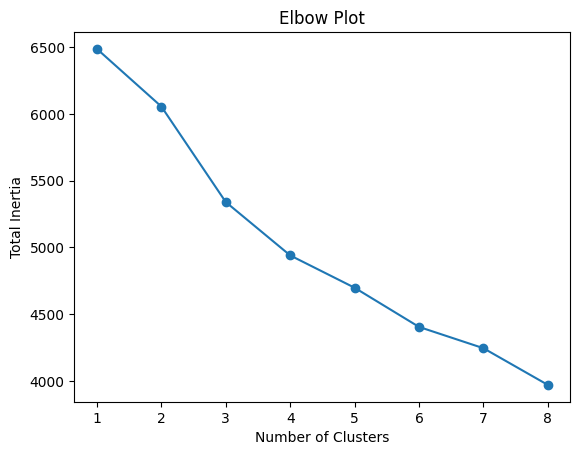

In [372]:
# Step 9: Showing the Elbow plot
plt.plot(range(1, len(total_inertia_list) + 1), total_inertia_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Inertia')
plt.title('Elbow Plot')

plt.show()

Approach 2: With Scikit learn

In [346]:
# Step 1: Get data
dataset2 = pd.read_csv(r"C:\Users\leesi\Documents\Favorites\Data Sources\Practice of K - means algorithm Data\77_cancer_proteomes_CPTAC_itraq_trimed_2.csv")

In [374]:
# Play with the dataset
dataset2.head(5)

,BH-A0C1.16TCGA,A2-A0EY.16TCGA
0,-0.518366,1.174881
1,-0.510002,1.183209
2,-0.507214,1.183209
3,-0.518366,1.174881
4,-0.512790,1.179045


In [375]:
# Step 2: Import scikit learn
from sklearn.cluster import KMeans as KM
from sklearn.preprocessing import StandardScaler

In [381]:
# Step 3: Preprocessing the data
Obj1_SS1 = StandardScaler()
dataset2_T = Obj1_SS1.fit_transform(dataset2)

In [382]:
# Play with the dataset
print(dataset2_T)

[[-0.09710107  0.51336065]
 [-0.09258415  0.51800512]
 [-0.09107851  0.51800512]
 ...
 [-1.11039526 -0.42482042]
 [-4.95428841  2.42223402]
 [-3.17462461  3.30468157]]


In [408]:
# Step 4: Try to run the model
KM_obj = KM(n_clusters=5, random_state=5, init='k-means++', n_init=10, algorithm = 'elkan')  # Explicitly set the value of n_init
KM_obj.fit(dataset2_T)

KMeans(algorithm='elkan', n_clusters=5, n_init=10, random_state=5)

In [409]:
# Step 5: Modify the dataset
dataset2_T_df = pd.DataFrame(data = dataset2_T, columns = ['BH-A0C1.16TCGA', 'A2-A0EY.16TCGA'])
dataset2_T_df['kmeans_5'] = KM_obj.labels_

In [410]:
# Play with the dataset
dataset2_T_df.head(5)

,BH-A0C1.16TCGA,A2-A0EY.16TCGA,kmeans_5
0,-0.097101,0.513361,2
1,-0.092584,0.518005,2
2,-0.091079,0.518005,2
3,-0.097101,0.513361,2
4,-0.094090,0.515683,2


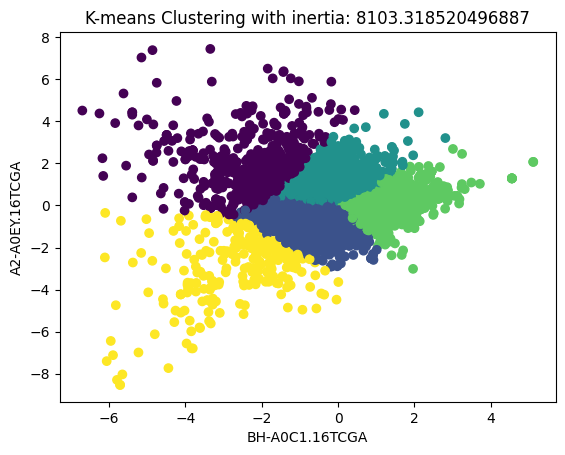

In [412]:
# Plot the result
plt.scatter(x=dataset2_T_df['BH-A0C1.16TCGA'], y=dataset2_T_df['A2-A0EY.16TCGA'], c=dataset2_T_df['kmeans_5'])
plt.xlabel('BH-A0C1.16TCGA')
plt.ylabel('A2-A0EY.16TCGA')
plt.title('K-means++ Clustering with inertia: ' + str(KM_obj.inertia_))

plt.show()